In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [ ]:
student_data=pd.read_csv('/content/StudentPerformanceFactors.csv')
student_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
student_data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
student_data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
X=student_data.drop('Exam_Score',axis=1)
y=student_data['Exam_Score']

numerical_features=X.select_dtypes(exclude='object').columns
categorical_features=X.select_dtypes(include='object').columns

In [ ]:
print('Numerical Features: ',numerical_features)

Numerical Features:  Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity'],
      dtype='object')


### Data Cleaning

In [ ]:
# Handel Missing Values
student_data['Teacher_Quality'].fillna(student_data['Teacher_Quality'].mode()[0],inplace=True)
student_data['Parental_Education_Level'].fillna(student_data['Parental_Education_Level'].mode()[0],inplace=True)
student_data['Distance_from_Home'].fillna(student_data['Distance_from_Home'].mode()[0],inplace=True)

/tmp/ipython-input-1450224287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_data['Teacher_Quality'].fillna(student_data['Teacher_Quality'].mode()[0],inplace=True)
/tmp/ipython-input-1450224287.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [ ]:
X.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
student_data.duplicated().sum()

np.int64(0)

### EDA

In [ ]:
categorical_features=student_data.select_dtypes(include='object').columns
categorical_features

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [ ]:
numerical_features=student_data.select_dtypes(exclude='object').columns
numerical_features

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [ ]:
X.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000


In [ ]:
y.describe()

,Exam_Score
count,6607.000000
mean,67.235508
std,3.889161
min,55.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,100.000000


In [ ]:
# Handel 'Exam_score' value =101
student_data.loc[student_data['Exam_Score'] > 100, 'Exam_Score'] = 100

In [ ]:
X.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


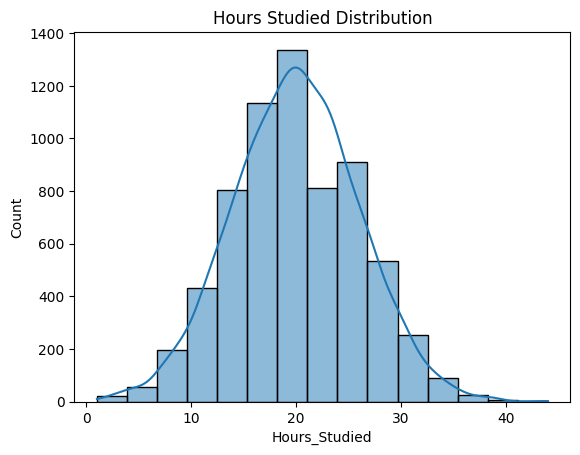

In [ ]:
sns.histplot(student_data['Hours_Studied'], bins=15, kde=True)
plt.title('Hours Studied Distribution')
plt.show()

array([[<Axes: title={'center': 'Hours_Studied'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'Sleep_Hours'}>],
       [<Axes: title={'center': 'Previous_Scores'}>,
        <Axes: title={'center': 'Tutoring_Sessions'}>,
        <Axes: title={'center': 'Physical_Activity'}>],
       [<Axes: title={'center': 'Exam_Score'}>, <Axes: >, <Axes: >]],
      dtype=object)

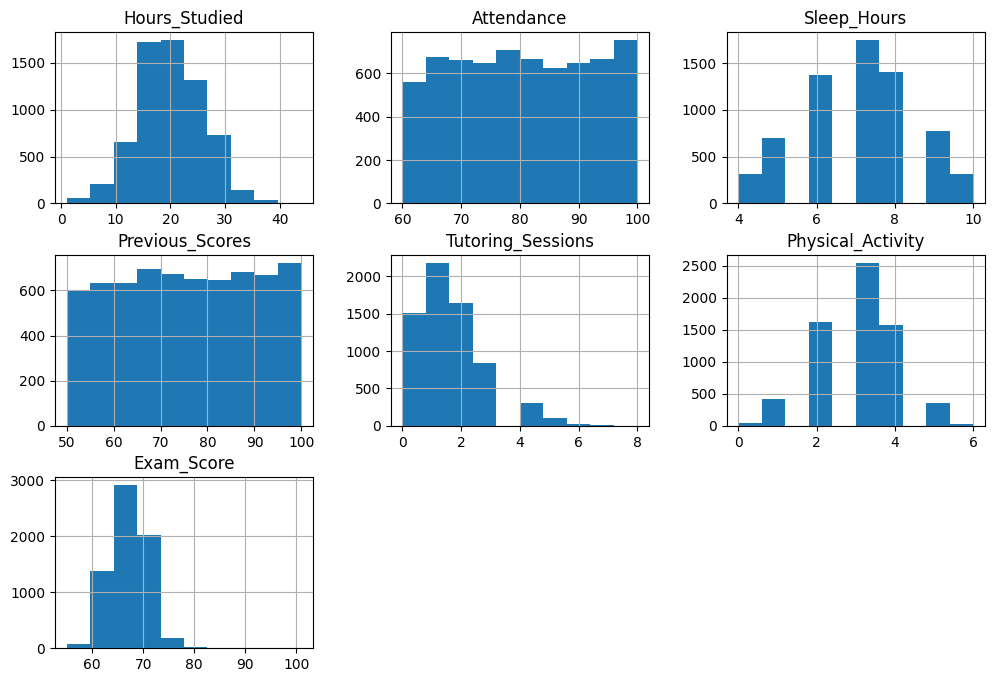

In [ ]:
student_data.hist(figsize=(12,8))

<Axes: >

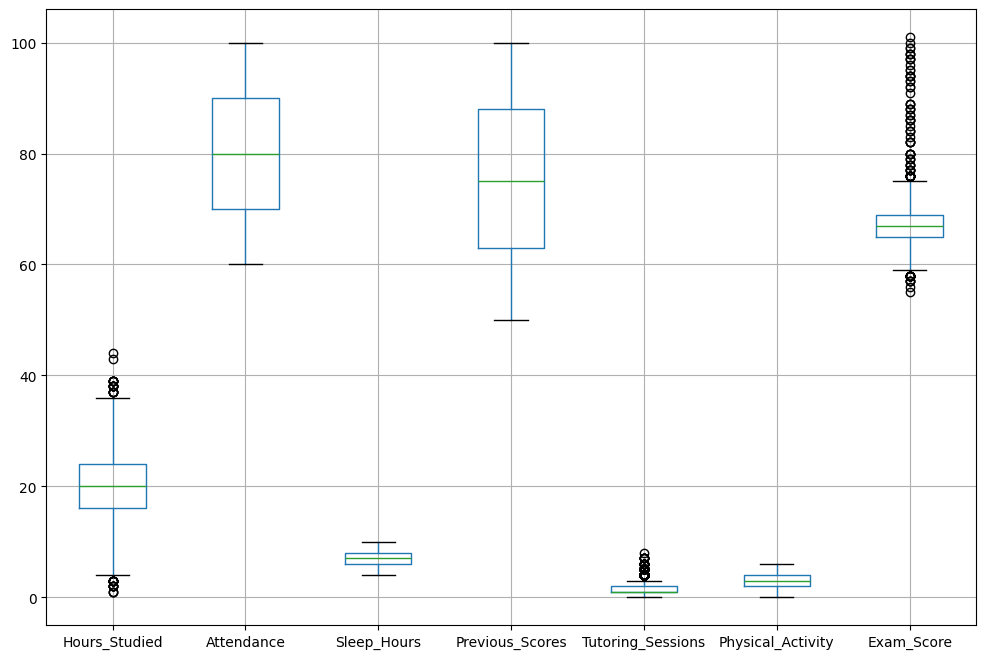

In [ ]:
# Show Outliers
student_data.boxplot(figsize=(12,8))

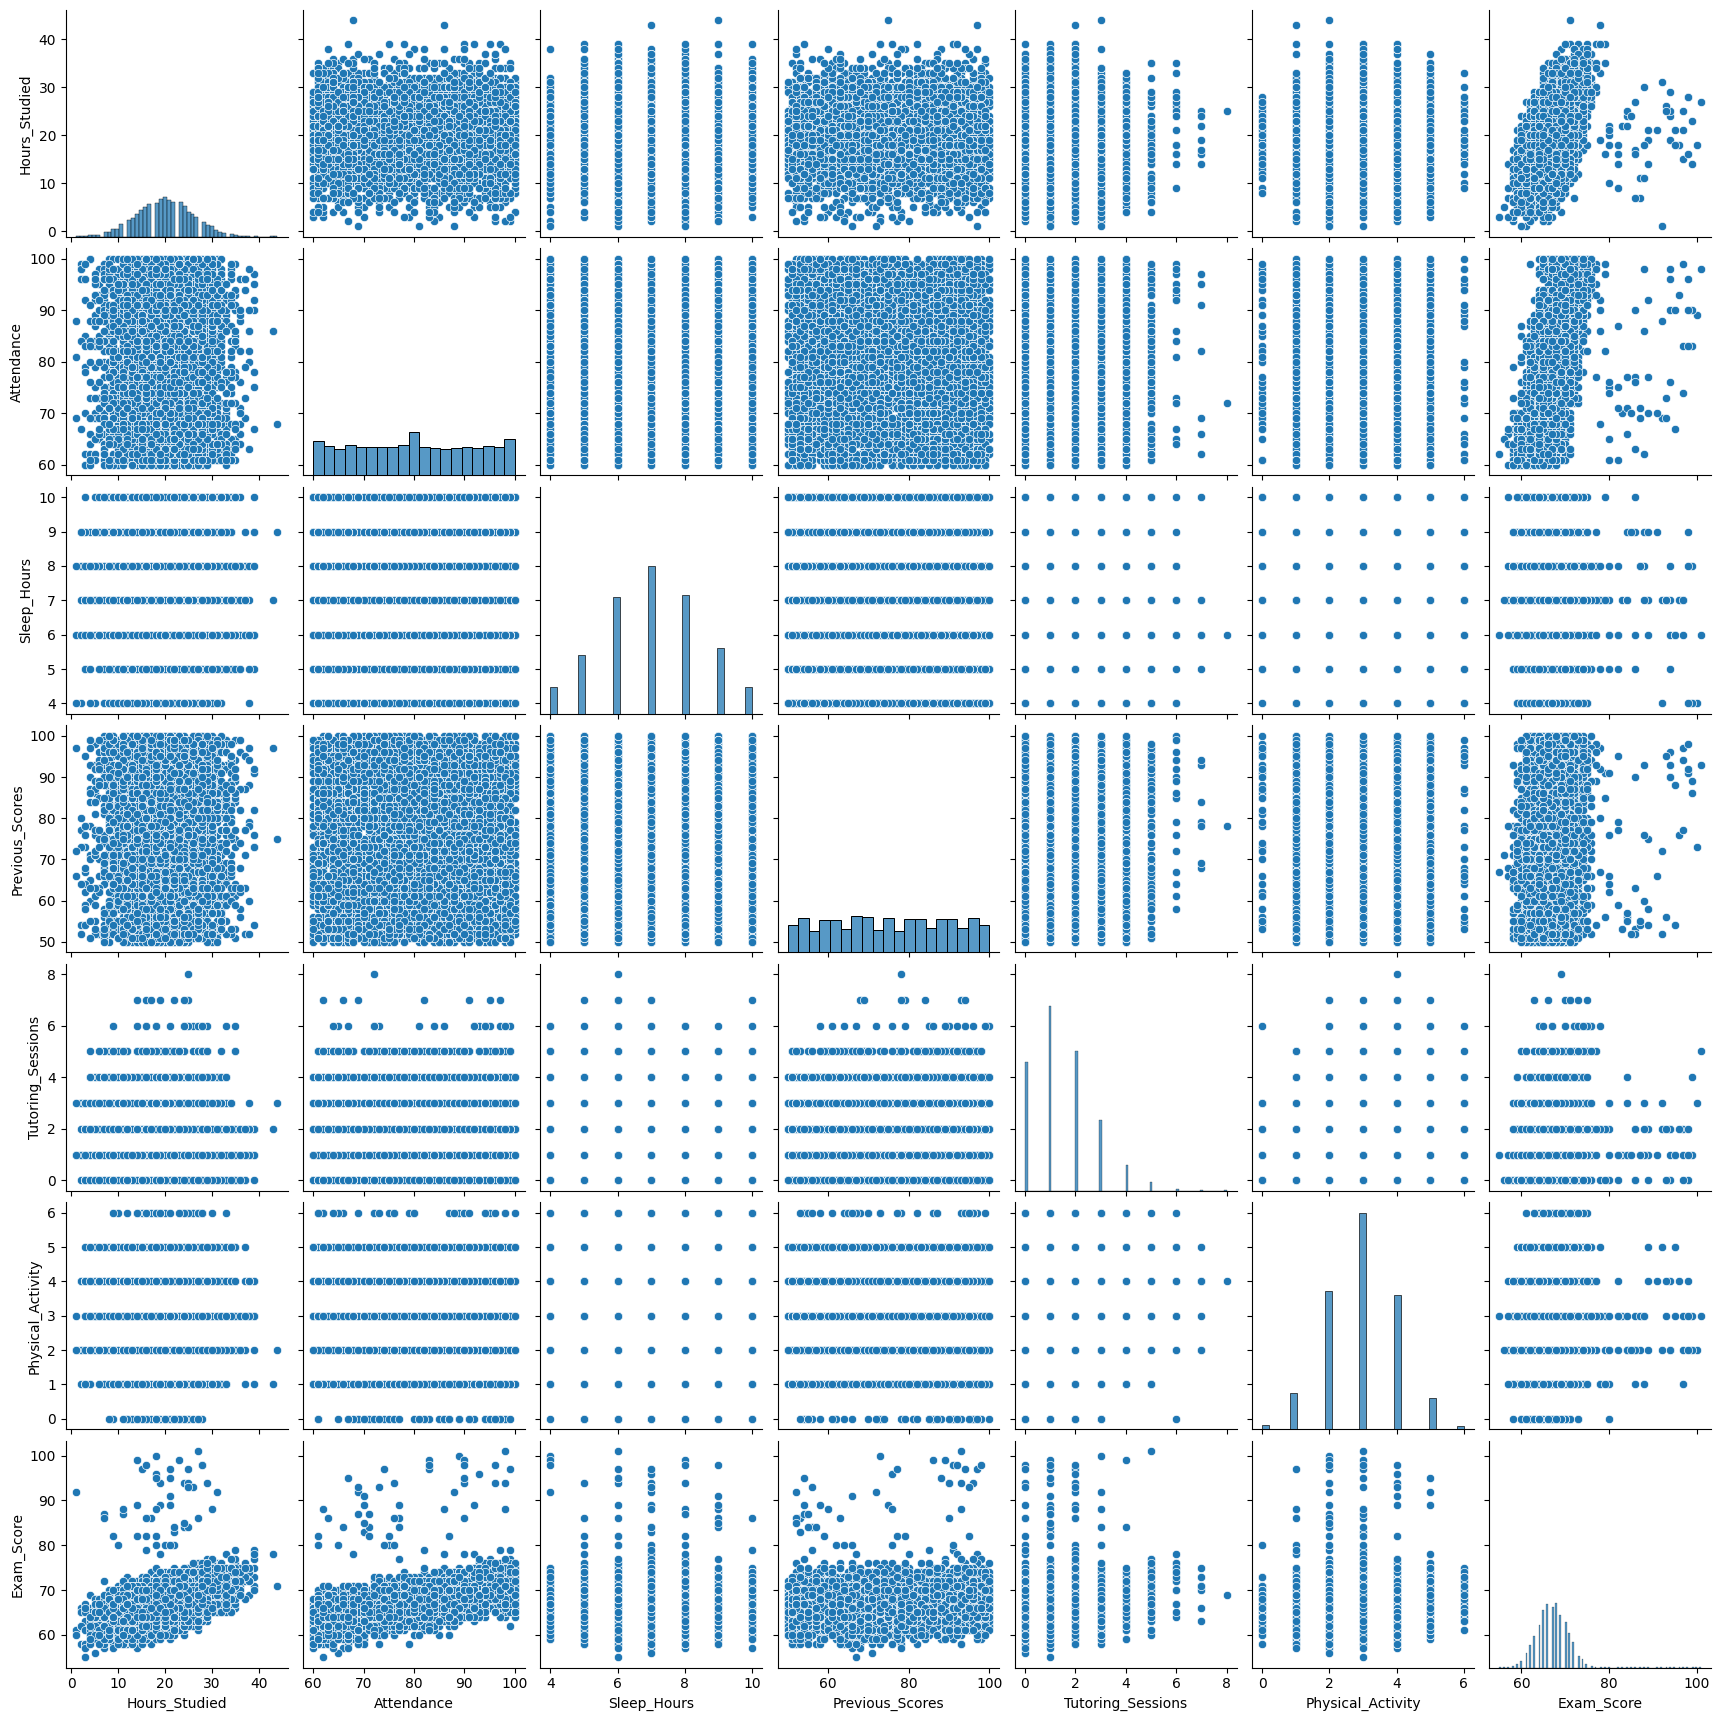

In [ ]:
# show relationships between all numerical features and target
sns.pairplot(student_data)

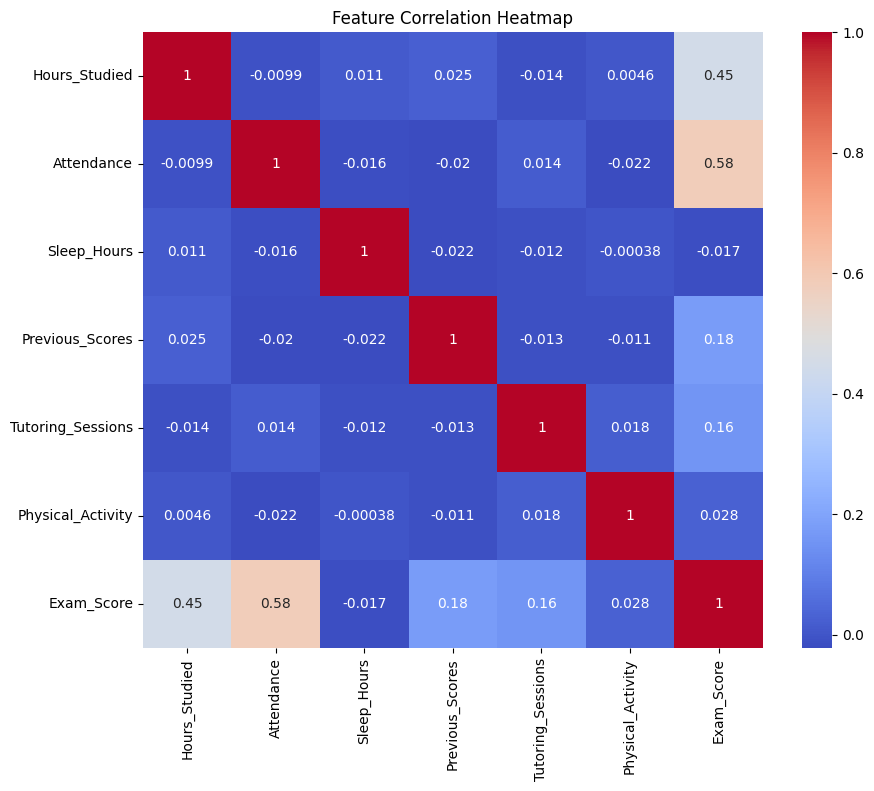

In [ ]:
# Correlation metrix
corr = student_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

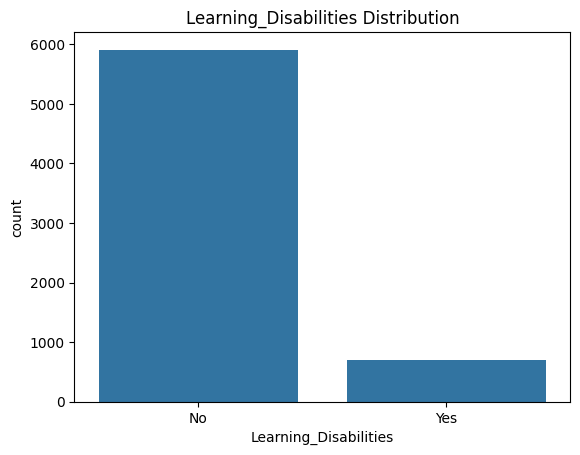

In [ ]:
sns.countplot(x='Learning_Disabilities', data=student_data)
plt.title('Learning_Disabilities Distribution')
plt.show()

### Data Cleaning [Outliers]

Found Accuracy decrease after handle Outliers, so the outliers is usefull for training the model

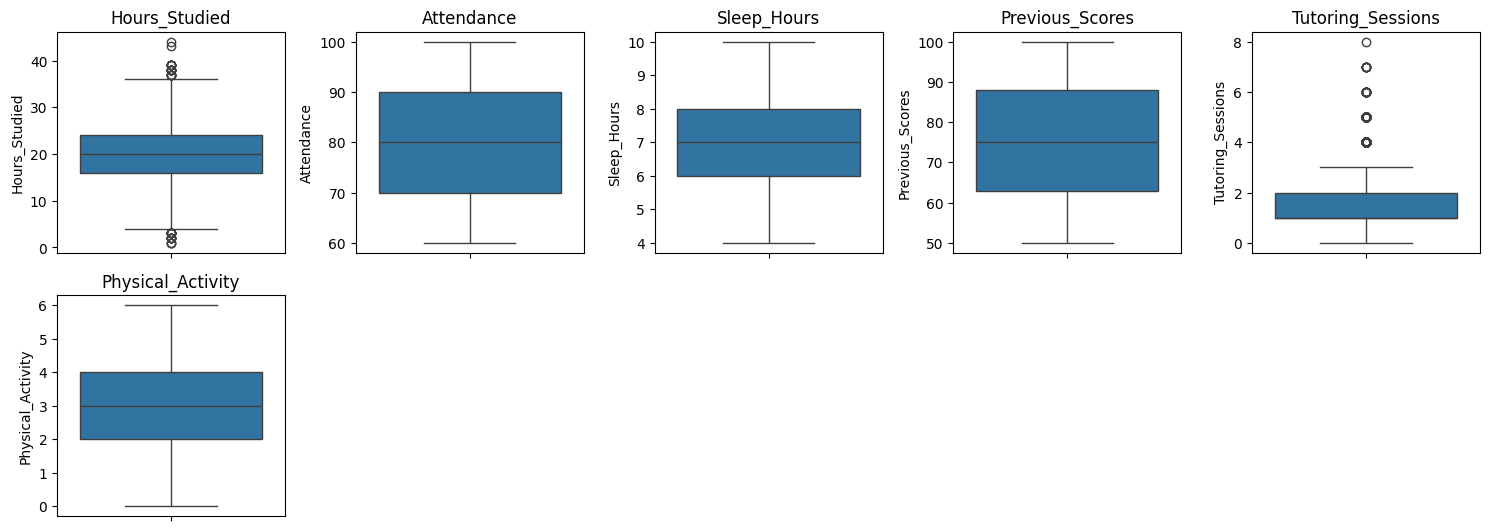

In [ ]:
# Showing The Outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=student_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Handel Outliers
outlier_cols=['Hours_Studied','Tutoring_Sessions']
for col in outlier_cols:
  Q1 = student_data[col].quantile(0.25)
  Q3 = student_data[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  student_data = student_data[(student_data[col] >= lower_bound) & (student_data[col] <= upper_bound)]



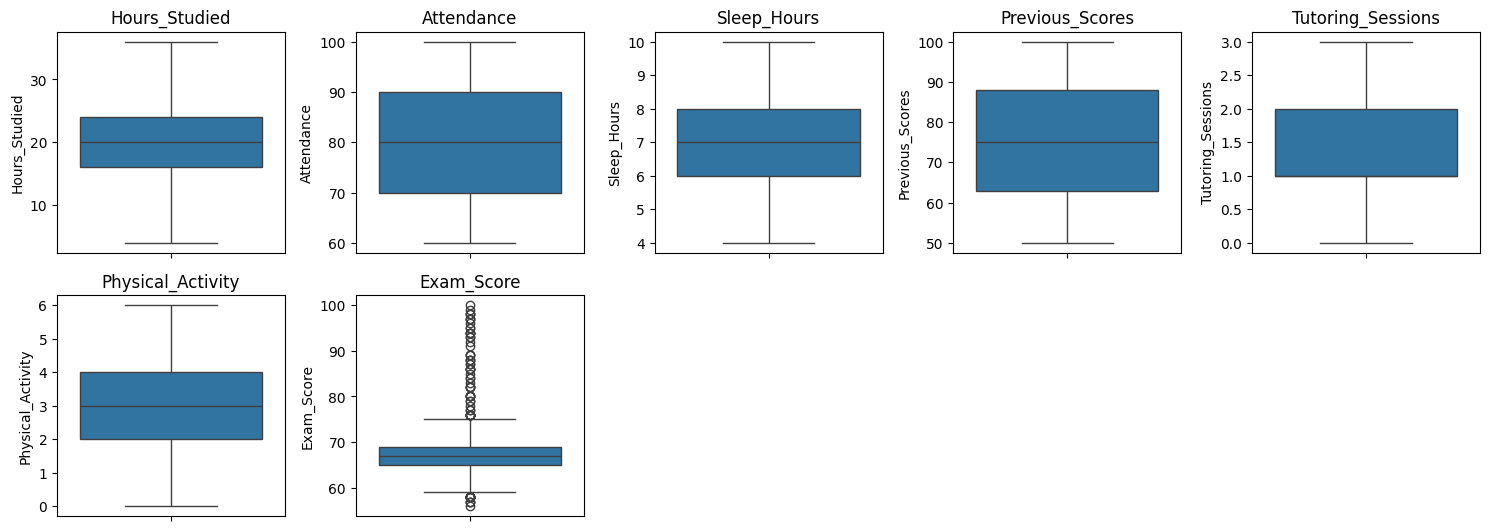

In [ ]:
# Showing The Outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=student_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### EDA

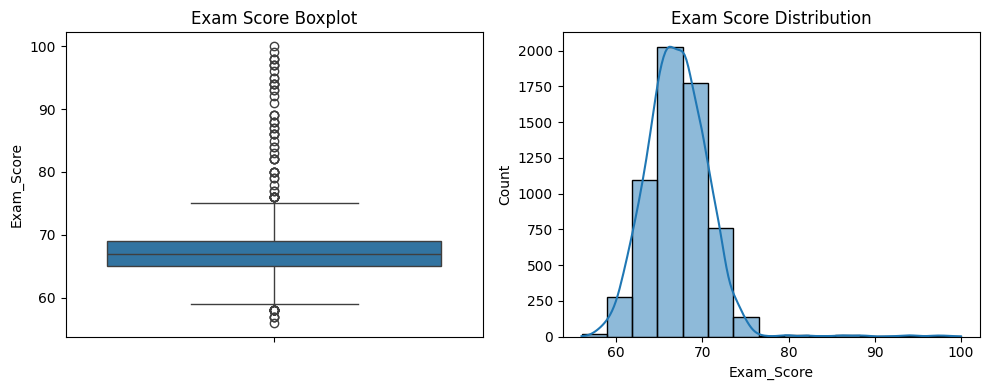

In [ ]:
# Target Column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(y=student_data['Exam_Score'])
plt.title('Exam Score Boxplot')

plt.subplot(1,2,2)
sns.histplot(student_data['Exam_Score'], bins=15, kde=True)
plt.title('Exam Score Distribution')

plt.tight_layout()
plt.show()


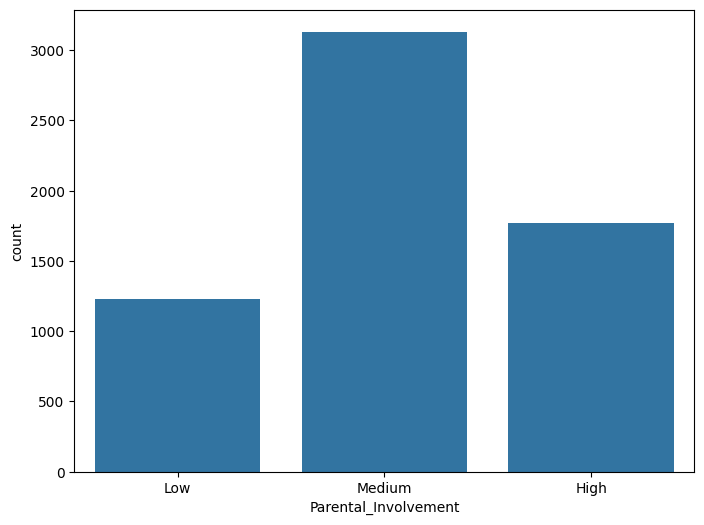

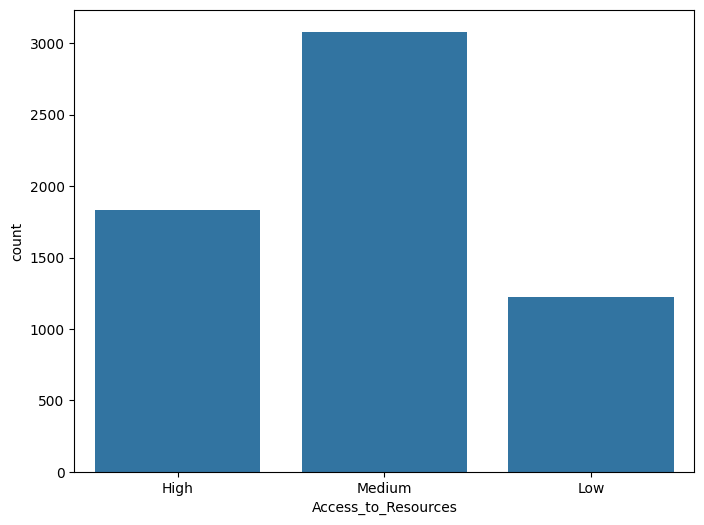

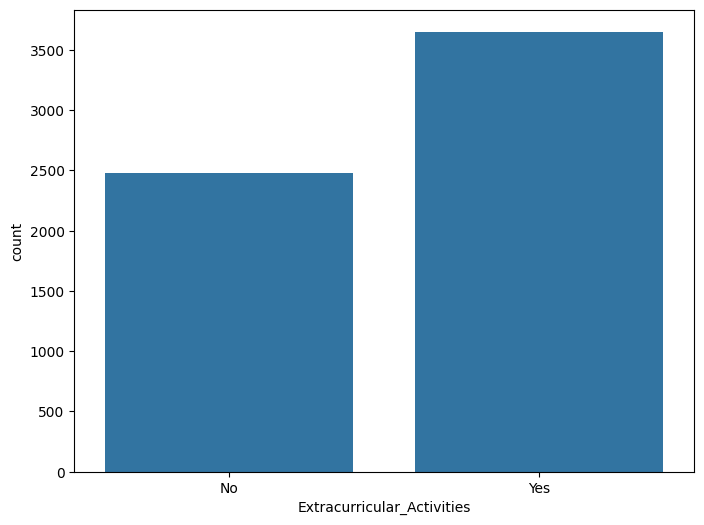

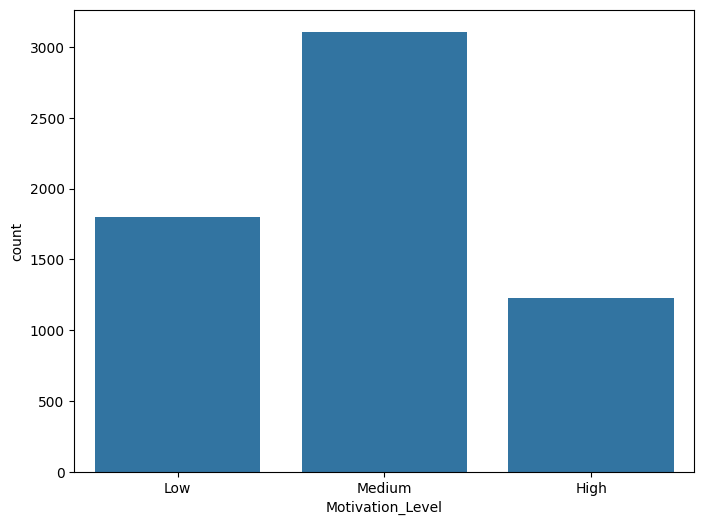

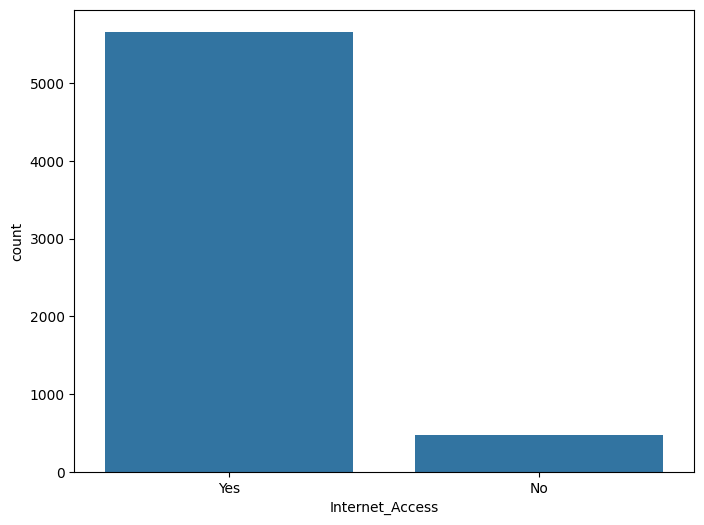

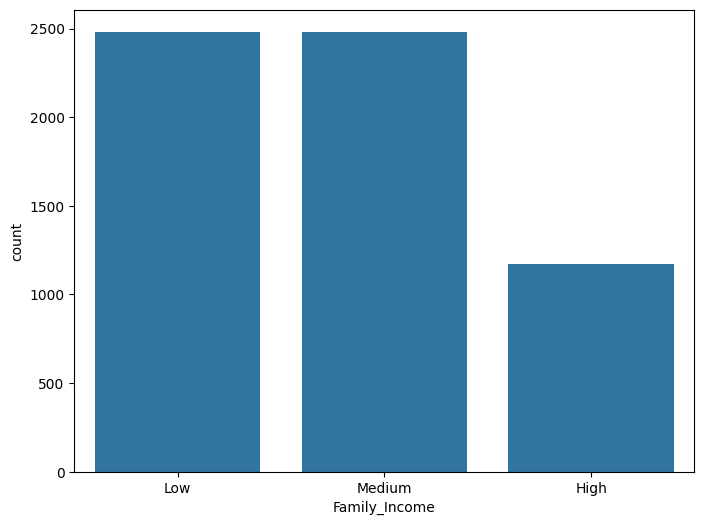

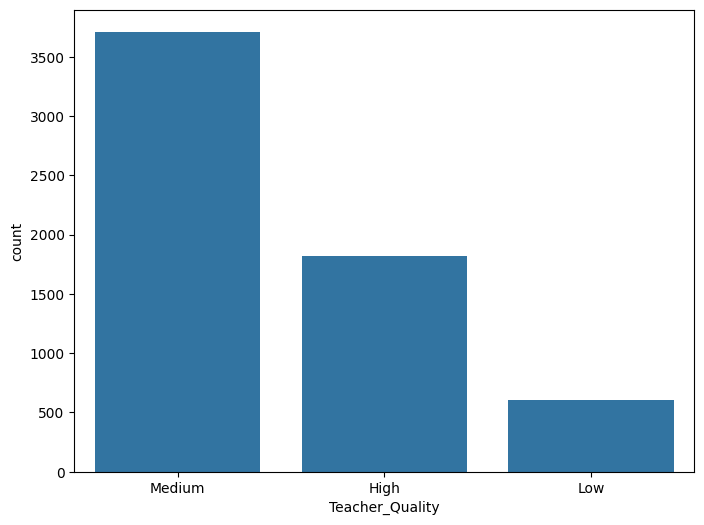

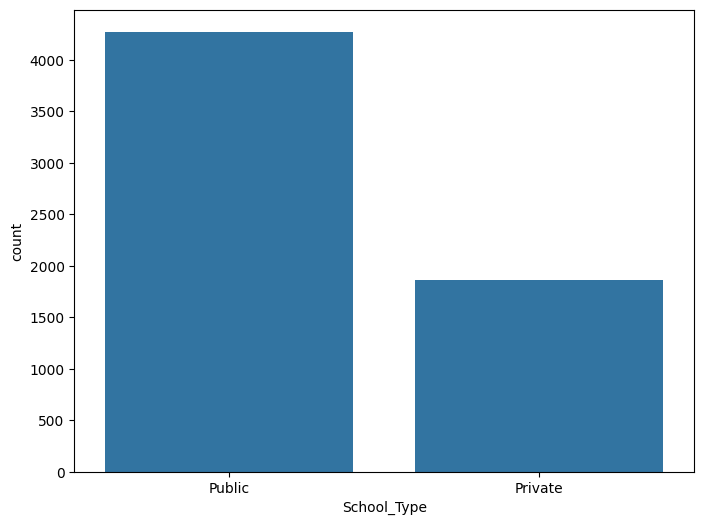

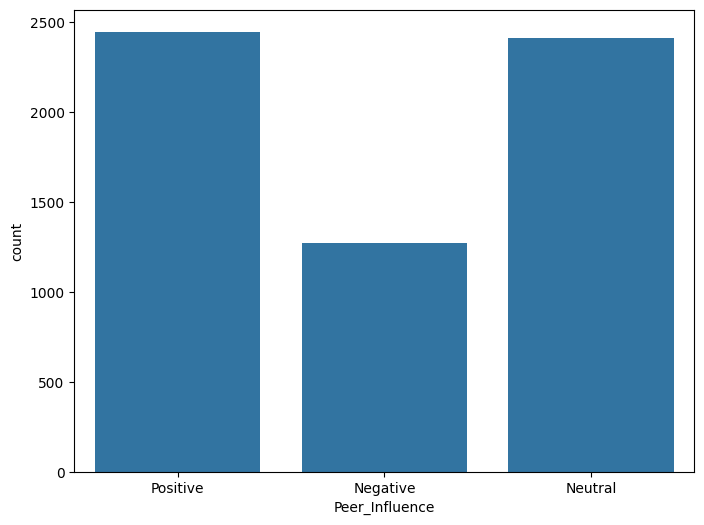

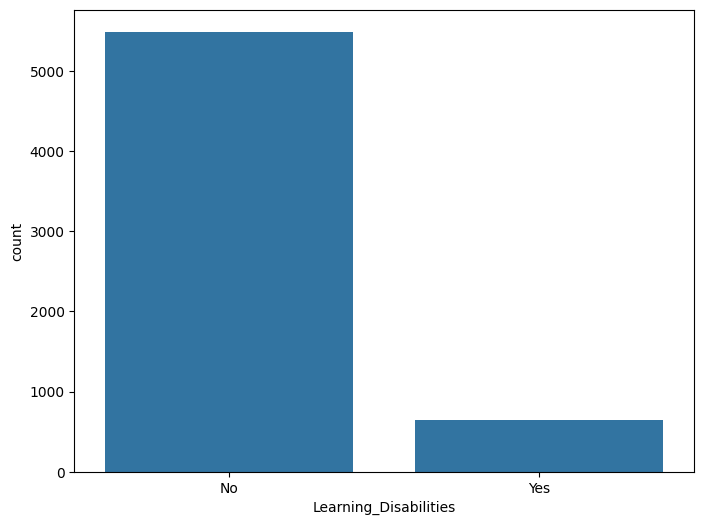

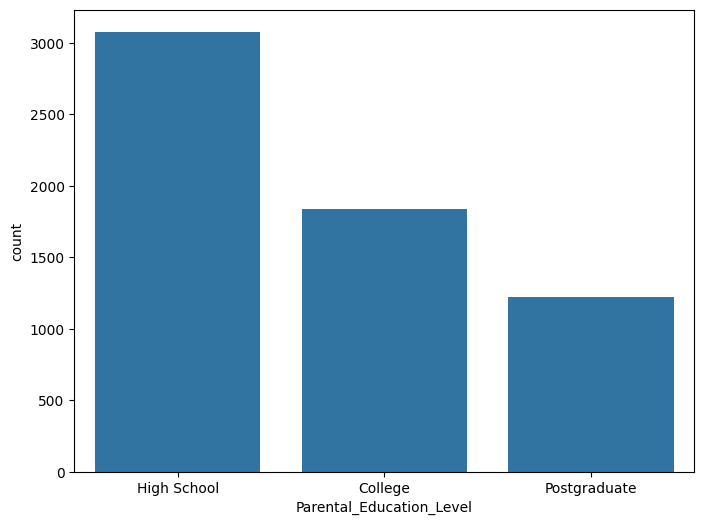

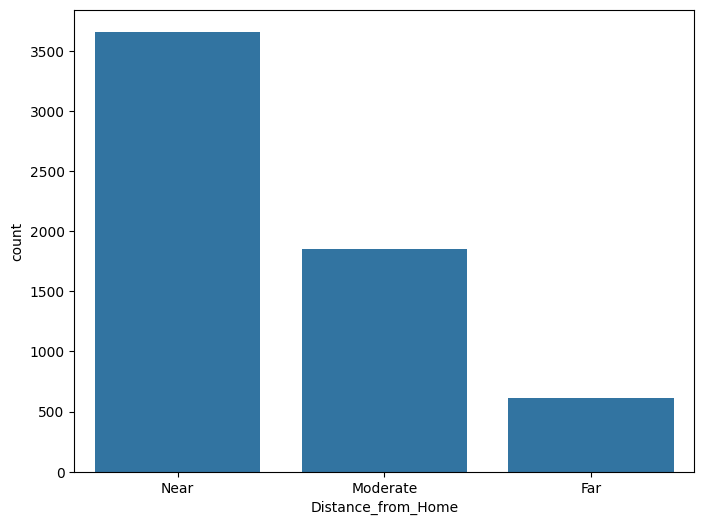

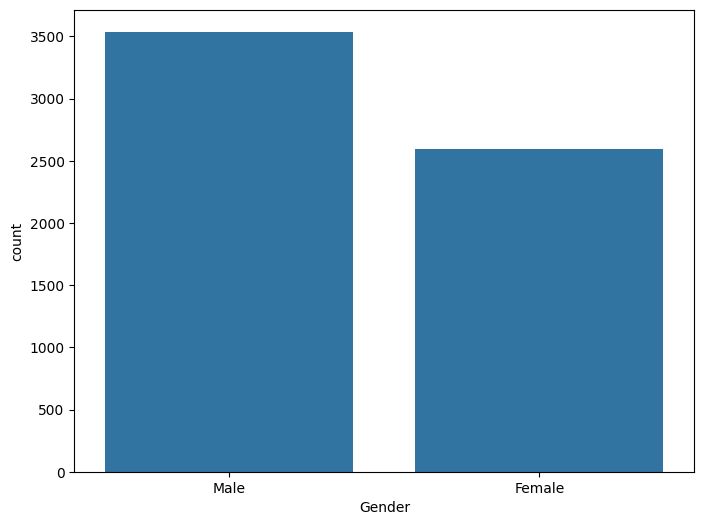

In [ ]:
# categorical features
for col in categorical_features:
  plt.figure(figsize=(8,6))
  sns.countplot(x=col, data=student_data)

In [ ]:
ordinal_cols=['Parental_Involvement', 'Access_to_Resources','Motivation_Level','Family_Income', 'Teacher_Quality', 'Peer_Influence','Parental_Education_Level',
       'Distance_from_Home'] # Label Encoder
nominal_cols=['Gender' , 'Extracurricular_Activities' , 'Internet_Access' , 'School_Type' , 'Learning_Disabilities'] # One Hot Encoder [get.dummies]

### Training model Pipeline

In [ ]:
X=student_data.drop('Exam_Score',axis=1)
y=student_data['Exam_Score']

In [ ]:
numerical_features=X.select_dtypes(exclude='object').columns


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train.shape

(5615, 19)

In [ ]:
X_train

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
5020,20,65,High,Medium,Yes,8,71,Low,Yes,2,Low,Medium,Private,Neutral,3,Yes,College,Near,Female
5388,12,92,High,Low,Yes,7,89,Medium,Yes,1,Medium,High,Private,Neutral,2,No,Postgraduate,Moderate,Male
4269,26,92,Low,Medium,Yes,8,98,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,Postgraduate,Moderate,Male
4230,11,89,Low,High,No,9,69,Low,Yes,1,Low,Low,Public,Neutral,3,No,High School,Near,Male
6003,17,85,High,High,Yes,6,66,Medium,Yes,0,Medium,High,Public,Neutral,2,No,College,Moderate,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,15,82,Medium,Medium,Yes,7,93,Medium,Yes,3,Low,High,Public,Negative,2,No,High School,Moderate,Female
5191,20,65,Medium,Medium,Yes,8,97,High,Yes,0,Low,Medium,Public,Negative,3,No,College,Near,Female
5226,17,64,High,Low,Yes,10,63,Medium,Yes,0,High,Medium,Public,Positive,3,No,High School,Moderate,Female
5390,16,100,High,High,Yes,7,82,Medium,Yes,2,High,Medium,Public,Positive,2,No,High School,Near,Male


In [ ]:
ordinal_cols=['Parental_Involvement', 'Access_to_Resources','Motivation_Level','Family_Income', 'Teacher_Quality', 'Peer_Influence','Parental_Education_Level',
       'Distance_from_Home'] # Label Encoder
nominal_cols=['Gender' , 'Extracurricular_Activities' , 'Internet_Access' , 'School_Type' , 'Learning_Disabilities'] # One Hot Encoder [get.dummies]

In [ ]:
student_data['Family_Income'].value_counts()

,count
Family_Income,
Medium,2483
Low,2478
High,1173


In [ ]:
ordinal_mapping = [
    ['Low', 'Medium', 'High'],  # Parental_Involvement
    ['Low', 'Medium', 'High'],  # Access_to_Resources
    ['Low', 'Medium', 'High'],  # Motivation_Level
    ['Low', 'Medium', 'High'],  # Family_Income
    ['Low', 'Medium', 'High'],  # Teacher_Quality
    ['Negative', 'Neutral', 'Positive'],  # Peer_Influence
    ['High School', 'College', 'Postgraduate'],  # Parental_Education_Level
    ['Near', 'Moderate', 'Far']  # Distance_from_Home
]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


# المعالجات لكل نوع من الأعمدة
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', MinMaxScaler())
])
ordinal_transformer = OrdinalEncoder(categories=ordinal_mapping)
nominal_transformer = OneHotEncoder(drop='first')



# الدمج في ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols)
    ])

# بايبلاين كامل
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])



# التدريب
model.fit(X_train, y_train)

# التنبؤ
y_pred = model.predict(X_test)


In [ ]:

from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print('MSE: ',mse)
print('r2: ',r2)

MSE:  2.919097906412372
r2:  0.7966986351988806


Saving the trained model

In [ ]:
import pickle
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Standardization and train LR Model

In [ ]:
# Standarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [ ]:
# liner regression model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
# Evaluate LR Model
from sklearn.metrics import mean_squared_error, r2_score
y_pred=LR.predict(x_test_scaled)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.3992755391709535
R-squared: 0.6887688020307757


Model Improvement

In [ ]:
# Ridge & Lasso

from sklearn.linear_model import Ridge,Lasso

ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred_ridge=ridge.predict(x_test_scaled)

lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred_lasso=lasso.predict(x_test_scaled)

mse_ridge=mean_squared_error(y_test,y_pred_ridge)
mse_lasso=mean_squared_error(y_test,y_pred_lasso)

r2_ridge=r2_score(y_test,y_pred_ridge)
r2_lasso=r2_score(y_test,y_pred_lasso)

In [ ]:
print("Mean Squared Error (Ridge):", mse_ridge)
print("R-squared: (Ridge)", r2_ridge)

print("Mean Squared Error (lasso):", mse_lasso)
print("R-squared: (lasso)", r2_lasso)

Mean Squared Error (Ridge): 4.39927942406251
R-squared: (Ridge) 0.6887685271901929
Mean Squared Error (lasso): 7.946270181394097
R-squared: (lasso) 0.4378330782144024


In [ ]:
# Polynomial Features

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
x_train_poly=poly.fit_transform(x_train_scaled)
x_test_poly=poly.transform(x_test_scaled)

LR_poly= LinearRegression()
LR_poly.fit(x_train_poly,y_train)

y_pred_poly=LR_poly.predict(x_test_poly)

mse_poly=mean_squared_error(y_test,y_pred_poly)
r2_poly=r2_score(y_test,y_pred_poly)

In [ ]:
print("Mean Squared Error (Polynomial Regression):", mse_poly)
print("R-squared: (Polynomial Regression)", r2_poly)

Mean Squared Error (Polynomial Regression): 3.418582473341238
R-squared: (Polynomial Regression) 0.7581489249625194


In [ ]:
# Random Forset Regressor
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2
)

RF.fit(x_train_scaled,y_train)

y_pred_RF= RF.predict(x_test_scaled)

mse_RF=mean_squared_error(y_test,y_pred_RF)
r2_RF=r2_score(y_test,y_pred_RF)

print("Mean Squared Error (Random Forset):", mse_RF)
print("R-squared: (Random Forset)", r2_RF)

Mean Squared Error (Random Forset): 4.828153252647504
R-squared: (Random Forset) 0.6584274143729426


In [ ]:
# HyperTuning using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestRegressor(random_state=42)

param_dist={
    'n_estimators':[100,200,300,500],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['sqrt','log2']

}

random_search=RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train_scaled,y_train)
print('Best Parameters: ', random_search.best_params_)

best_rf=random_search.best_estimator_
y_pred_best_rf=best_rf.predict(x_test_scaled)

mse_best=mean_squared_error(y_test,y_pred_best_rf)
r2_best=r2_score(y_test,y_pred_best_rf)

print("Best Random Forest MSE: ", mse_best)
print("Best Random Forest R²: ", r2_best)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best Random Forest MSE:  4.547542866501807
Best Random Forest R²:  0.6782794799835432


### Try 'Hours_Studied' as the only feature

In [ ]:
data=pd.read_csv('/content/StudentPerformanceFactors.csv')



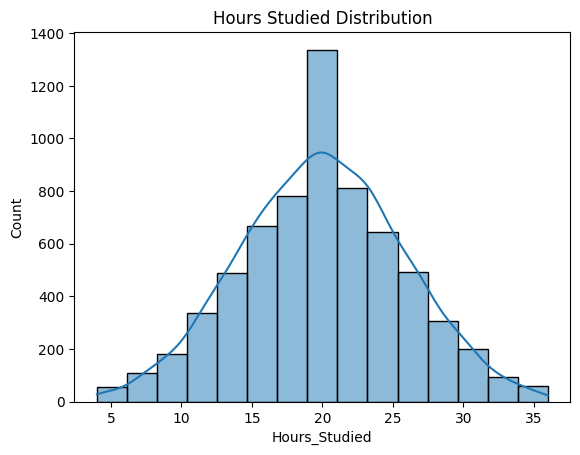

In [ ]:
sns.histplot(X, bins=15, kde=True)
plt.title('Hours Studied Distribution')
plt.show()

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

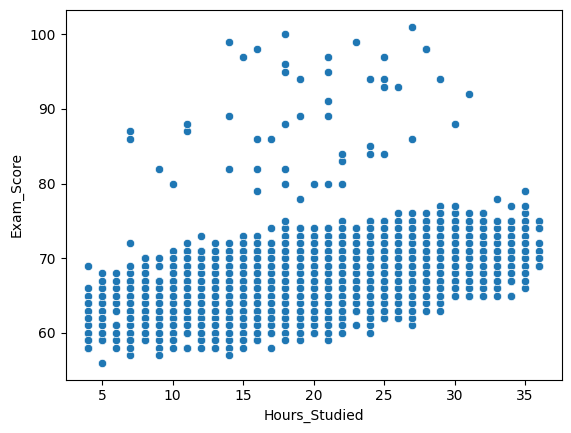

In [ ]:
sns.scatterplot(x=X,y=y)

In [ ]:
Q1 = data['Hours_Studied'].quantile(0.25)
Q3 = data['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Hours_Studied'] >= lower_bound) & (data['Hours_Studied'] <= upper_bound)]

In [ ]:
X=data[['Hours_Studied']]
y=data['Exam_Score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [ ]:
# liner regression model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
# Evaluate LR Model
from sklearn.metrics import mean_squared_error, r2_score
y_pred=LR.predict(x_test_scaled)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 10.855921288793322
R-squared: 0.2319868674542105


Accuracy has decreased significantly.

### Sample of Data

In [ ]:
student_data.sample()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2677,11,73,Medium,Medium,No,7,67,Medium,No,3,Medium,High,Private,Positive,5,Yes,Postgraduate,Near,Male,63
